In [2]:
#import the libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#download the data
end='2024-08-27'
start=pd.to_datetime(end)-pd.DateOffset(365*6)
data=yf.download('SPY',start=start,end=end)
data.columns

[*********************100%%**********************]  1 of 1 completed


Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
data_1=data.drop(columns=['Open','High','Low','Adj Close','Volume'])

In [11]:
## Calculate the short-term and long-term EMAs
data['EMA20']=data['Close'].ewm(span=short_window, adjust=False).mean()
data['EMA50']=data['Close'].ewm(span=long_window, adjust=False).mean()

In [12]:
short_window = 20
long_window = 50
data['Signal']=0
data['Signal'][short_window:]=np.where(data['EMA20'][short_window:]>data['EMA50'][short_window:],1,0)
data['Position']=data['Signal'].diff()

C:\Users\User\AppData\Local\Temp\ipykernel_7772\3733989063.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Signal'][short_window:]=np.where(data['EMA20'][short_window:]>data['EMA50'][short_window:],1,0)
C:\Users\User\AppData\Local\

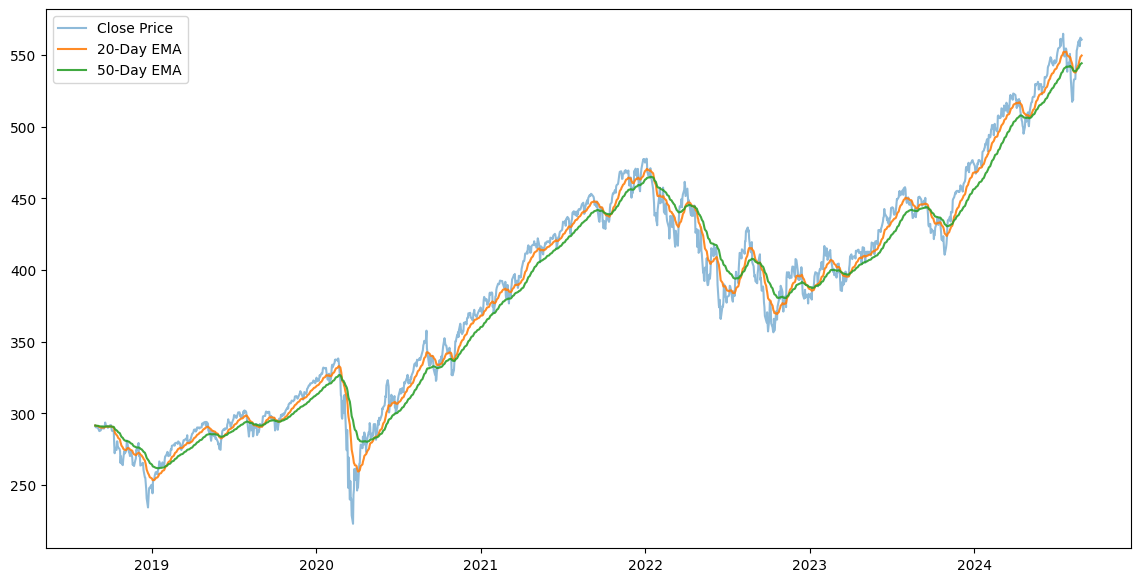

In [14]:
# Plotting the stock price and EMAs
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', alpha=0.5)
plt.plot(data['EMA20'], label='20-Day EMA', alpha=0.9)
plt.plot(data['EMA50'], label='50-Day EMA', alpha=0.9)
plt.legend()

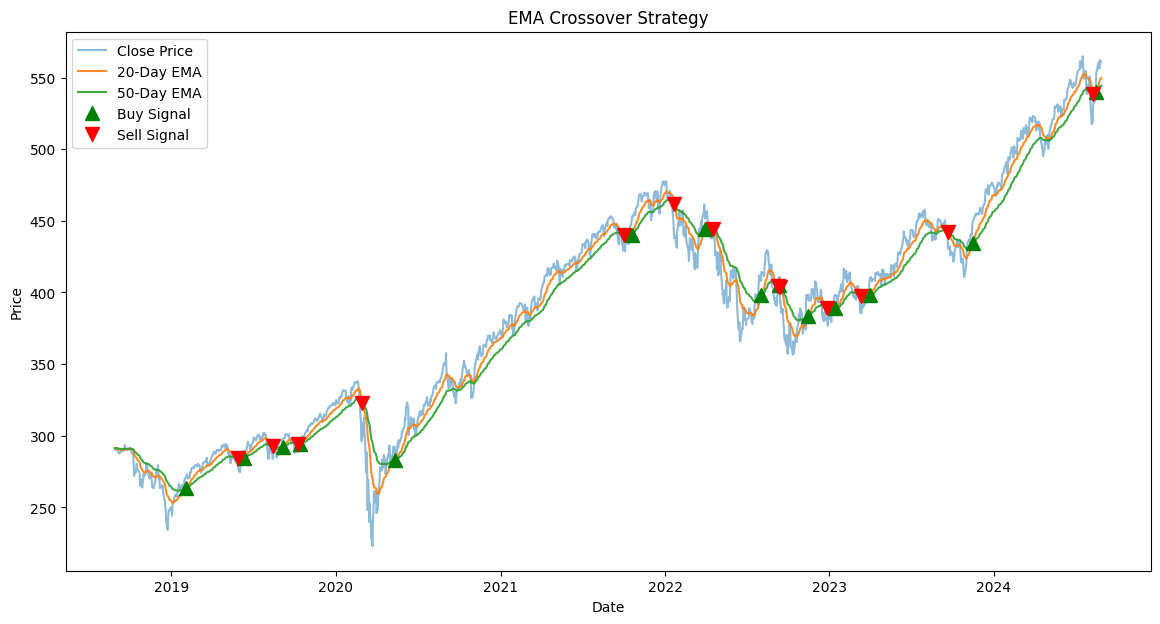

In [16]:
# Plot buy signals
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', alpha=0.5)
plt.plot(data['EMA20'], label='20-Day EMA', alpha=0.9)
plt.plot(data['EMA50'], label='50-Day EMA', alpha=0.9)
plt.plot(data[data['Position'] == 1].index, 
         data['EMA20'][data['Position'] == 1], 
         '^', markersize=10, color='g', label='Buy Signal')

# Plot sell signals
plt.plot(data[data['Position'] == -1].index, 
         data['EMA20'][data['Position'] == -1], 
         'v', markersize=10, color='r', label='Sell Signal')

plt.title('EMA Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()